# Prediccion de salarios por pais

El objetivo de este proyecto es predecir el salario de personas de diversos países y razas en función de sus datos demográficos, como ocupación, edad, sexo, experiencia, educación, etc. El conjunto de datos se ha tomado de Kaggle. La variable objetivo es el Salario

### Dataset

El conjunto de datos consiste en una colección completa de información demográfica, salarios y años de experiencia.
Los atributos demográficos incluyen edad, sexo, educación, país y raza, proporcionando una amplia gama de variables para el análisis. Los investigadores pueden explorar patrones y tendencias en la distribución de ingresos en diferentes categorías demográficas, lo que permite obtener información sobre posibles disparidades o variaciones en el potencial de ingresos. Además, el conjunto de datos incorpora la dimensión crucial de los años de experiencia, lo que permite investigar el impacto de la permanencia profesional en los niveles salariales. Este aspecto añade un aspecto dinámico al análisis, permitiendo a los investigadores examinar cómo varían los ingresos en función tanto de las características demográficas como de la experiencia laboral acumulada. El conjunto de datos presenta una gran oportunidad para realizar estudios integrales sobre la diversidad de los ingresos y comprender los factores multifacéticos que influyen en el potencial de ingresos en la fuerza laboral actual.


In [1]:
#cargo las librerias que voy a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#cargo dataset
df = pd.read_csv('/mnt/datasets/Salary_Data_Based_country_and_race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


## pre-procesamiento de datos

In [3]:
#checking hape data
# 6704 filas y 9 columnas
df.shape

(6704, 9)

In [4]:
#Valores NA 
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [5]:
# dropeo los valores NA
df.dropna(axis=0, inplace=True)

In [5]:
# vuelvo a chequear
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [7]:
# dropeo columna sin nombre
df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)

## chequeo naturaleza de las variables predictoras

In [8]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

### valores unicos

In [6]:
#unique values in each column
df.nunique()

Unnamed: 0             6704
Age                      41
Gender                    3
Education Level           7
Job Title               193
Years of Experience      37
Salary                  444
Country                   5
Race                     10
dtype: int64

The job title column has 191 different values. It will be very difficult to analyze so many job titles. So, I will group the job titles under similar job domains.

### Posiciones

In [7]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

## Agrupo las posiciones similares para simplificar

In [9]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [10]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

### Agrupo por nivel educativo alcanzado

In [11]:
def group_education(Educaton):
    
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)   

###  Estadistica descriptiva

In [12]:
#descriptive statistics
df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


## Analisis exploratorio


### Graficos

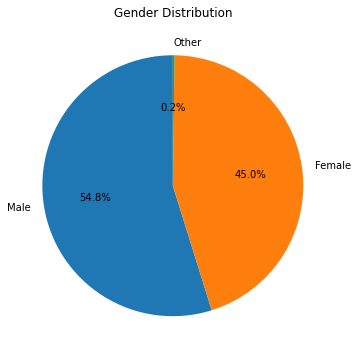

In [13]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

El gráfico  de torta muestra que la mayoría de los empleados son hombres con el 54.8% en el conjunto de datos, seguidos por mujeres con el 45% y el 0.2% de los empleados pertenecen a otro genero.

### Rangos etarios

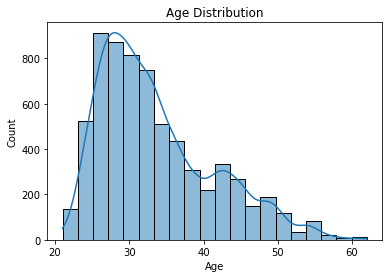

In [14]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

La mayoría de los empleados tienen entre 25 y 35 años de edad, lo que significa que la mayoría de los empleados son jóvenes y enérgicos. Solo hay un número mínimo de empleados antiguos en el conjunto de datos que tienen más de 55 años

### Nivel educativo alcanzado

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Masters'),
  Text(2, 0, 'PhD'),
  Text(3, 0, 'High School')])

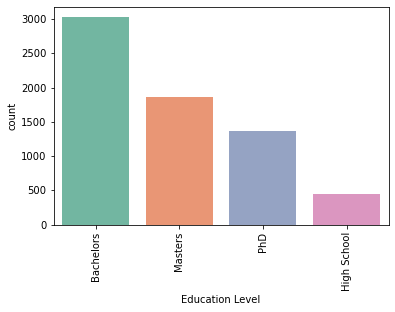

In [15]:
sns.countplot(x = 'Education Level', data = df, palette='Set2')
plt.xticks(rotation=90)

La mayoría de los empleados tiene nivel universitario seguido de una maestría y un doctorado. El menor número de empleados tiene educación secundaria. Del gráfico se desprende que la mayoría de los empleados comenzaron a trabajar después de la graduación, pocos de ellos comenzaron a trabajar después de la graduación y muy pocos de ellos han cursado el doctorado. El menor número de empleados ha comenzado a trabajar después de la educación secundaria.

### Posiciones

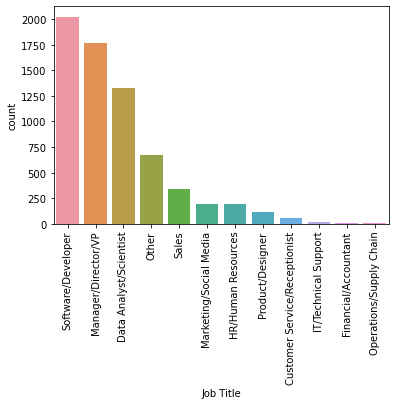

In [17]:
# Contar las ocurrencias de cada 'Job Title'
conteo_job_titles = df['Job Title'].value_counts()

# Ordenar los 'Job Title' de mayor a menor basado en su conteo
orden_job_titles = conteo_job_titles.index

# Ahora, genera el gráfico de barras con seaborn, usando el argumento 'order' para especificar el orden
sns.countplot(x='Job Title', data=df, order=orden_job_titles)
plt.xticks(rotation=90)
plt.show()

Este gráfico nos ayuda a desglosar los datos de cada posicion de una forma más sencilla. Del gráfico, queda claro que la mayoría de los empleados tienen puestos de trabajo: desarrollador de software, analista de datos / científico o gerente / director / vicepresidente. Pocos empleados tienen cargos como ventas, marketing / redes sociales, RR. HH., Diseñador de productos y servicio al cliente. Muy pocos de los empleados trabajan como financiero / contable o en gestión de operaciones / suministros.

A partir de esto, creo la hipótesis de que los títulos de trabajo como Desarrollador de software, Analista de datos / Científico y Gerente / Director tienen más demanda en comparación con otros títulos de trabajo. También significa que títulos de trabajo como financiero / contable o gestión de operaciones / suministro y servicio al cliente tienen menos demanda y se pagan comparativamente menos.

### Experiencia Laboral

<AxesSubplot:xlabel='Years of Experience', ylabel='Count'>

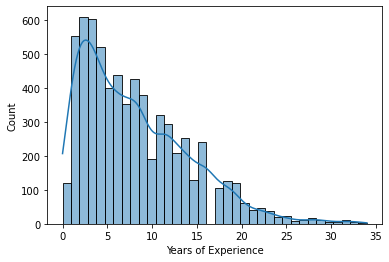

In [18]:
sns.histplot(x = 'Years of Experience', data = df,kde=True)

La mayoría de los empleados en el conjunto de datos tienen una experiencia de 0 a 7 años en los dominios respectivos, en los que la mayoría de ellos tiene una experiencia de menos de 5 años. Además, el número de empleados en el conjunto de datos disminuye con el aumento de años de experiencia.

### Paises

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UK'),
  Text(1, 0, 'USA'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Australia')])

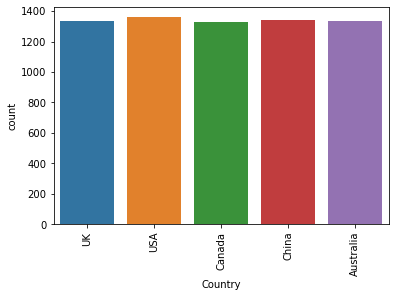

In [19]:
sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)

### Distribucion por Raza

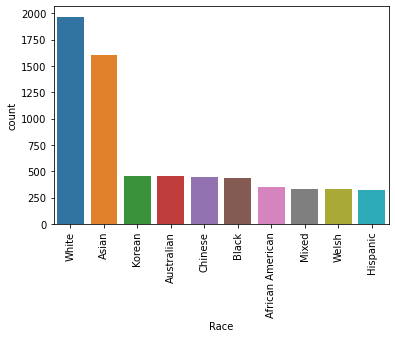

In [20]:
# Contar las ocurrencias de cada 'Race'
conteo_races = df['Race'].value_counts()

# Ordenar las 'Race' de mayor a menor basado en su conteo
orden_races = conteo_races.index

# Generar el gráfico de barras con seaborn, utilizando el orden definido
sns.countplot(x='Race', data=df, order=orden_races)
plt.xticks(rotation=90)
plt.show()

Este gráfico nos ayuda a conocer la distribución racial en el conjunto de datos. Del gráfico se desprende claramente que la mayoría de los empleados son blancos o asiáticos, seguidos de coreanos, chinos, australianos y negros. El número de empleados de raza galesa, afroamericana, mixta e hispana es menor en comparación con otros grupos.

### Edad y Salario

Text(0.5, 1.0, 'Edad vs Salario')

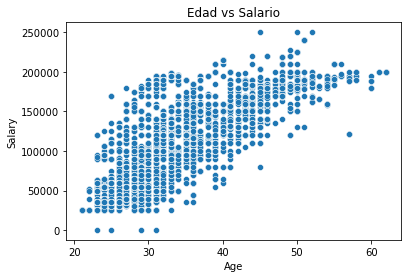

In [21]:
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Edad vs Salario')

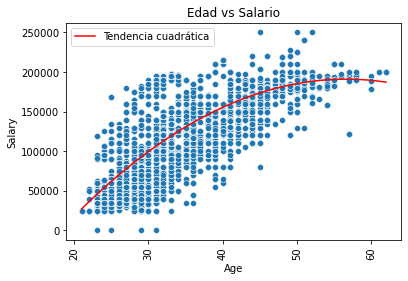

In [26]:
# Eliminar filas con NaN
df_limpio = df.dropna(subset=['Age', 'Salary'])

# Opcional: Verificar y manejar valores infinitos, si los hubiera. Aquí solo se muestra cómo identificarlos.
# df_limpio = df_limpio[~df_limpio['Salary'].isin([np.inf, -np.inf])]
coeficientes = np.polyfit(df_limpio['Age'], df_limpio['Salary'], 2)
polinomio = np.poly1d(coeficientes)

x_tendencia = np.linspace(df_limpio['Age'].min(), df_limpio['Age'].max(), 100)
y_tendencia = polinomio(x_tendencia)

# Continúa con la creación del gráfico como antes
sns.scatterplot(x='Age', y='Salary', data=df_limpio)
plt.plot(x_tendencia, y_tendencia, color='red', label='Tendencia cuadrática')
plt.title('Edad vs Salario')
plt.xticks(rotation=90)
plt.legend()
plt.show()



En este diagrama de dispersión vemos una tendencia a que el salario de la persona aumenta con la edad, lo cual es obvio por los ascensos y valoraciones. Sin embargo, después de una observación más cercana, podemos encontrar que la edad similar tiene múltiples salarios, lo que significa que hay otros factores que impactan en  el salario.

### Salarios y Genero

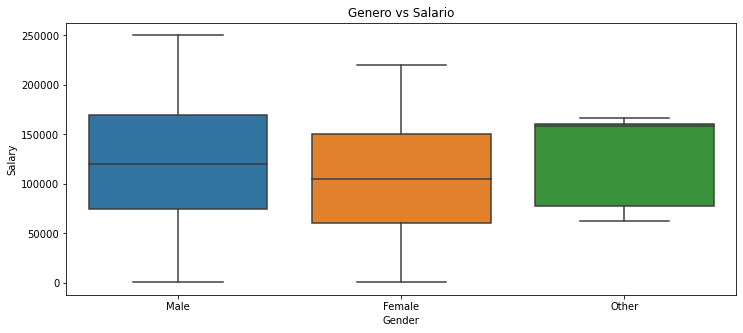

In [34]:
# Crear la figura y el eje con plt.subplots
fig, ax = plt.subplots(figsize=(12, 5))

# Ahora puedes usar 'ax' directamente para tu boxplot
sns.boxplot(x='Gender', y='Salary', data=df, ax=ax).set_title('Genero vs Salario')

# Mostrar el gráfico
plt.show()

El box plot describe la distribución salarial entre los tres géneros. En la gráfica de caja, los empleados de Otro género tienen un salario medio bastante alto en comparación con los hombres y las mujeres. Los empleados del otro genero tienen un salario medio superior a los 150000, seguidos por los hombres con un salario medio cercano a los 107500 y las mujeres con un salario medio cercano a los 100000.

### Salario y nivel educativo

Text(0.5, 1.0, 'Education Level vs Salary')

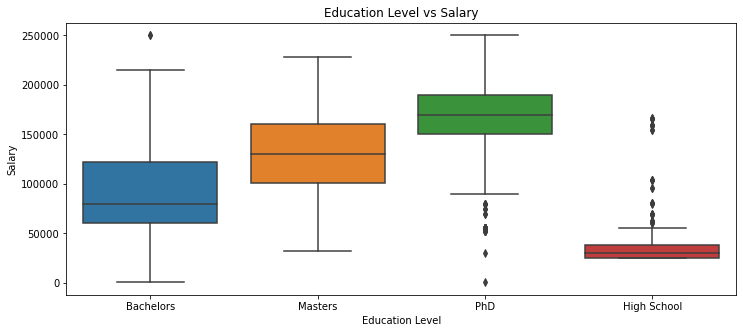

In [36]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, ax=ax).set_title('Education Level vs Salary')


El box plot muestra la distribución del salario en función del nivel de educación de los empleados. El salario medio para los   doctorados es el más alto, seguido por los  de maestría y universitarios, y los empleados sin título tienen el salario medio más bajo. 
A partir de este gráfico, asumo que los empleados con mayor nivel educativo tienen mayor salario que los empleados con menor nivel educativo.

### Posicion y Salario

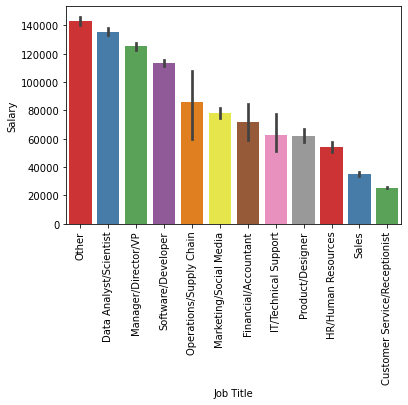

In [38]:
# Calcular la media de 'Salary' para cada 'Job Title'
ordenado = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).index

# Ahora, genera el gráfico de barras con seaborn, usando el orden calculado
sns.barplot(x='Job Title', y='Salary', data=df, order=ordenado, palette='Set1')
plt.xticks(rotation=90)
plt.show()

### Salario y experiencia labral

Text(0.5, 1.0, 'Years of Experience vs Salary')

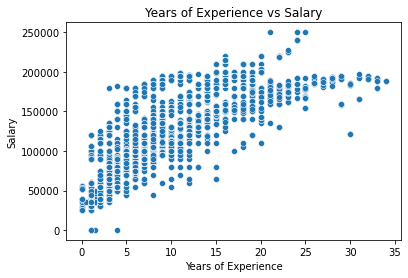

In [39]:
sns.scatterplot(x= 'Years of Experience', y  = 'Salary', data = df).set_title('Years of Experience vs Salary')

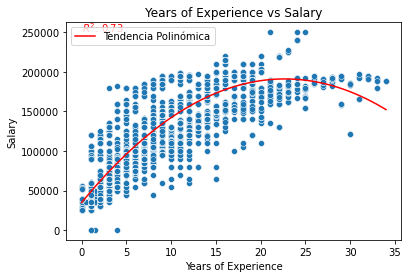

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from numpy.polynomial.polynomial import polyfit

df_limpio = df.dropna(subset=['Years of Experience', 'Salary'])

# Ajustar un modelo polinómico de segundo grado a los datos
coeficientes = np.polyfit(df_limpio['Years of Experience'], df_limpio['Salary'], 2)
# Crear un modelo polinómico a partir de los coeficientes
modelo_polinomico = np.poly1d(coeficientes)

# Generar datos de x para la línea de tendencia
x = np.linspace(df_limpio['Years of Experience'].min(), df_limpio['Years of Experience'].max(), 100)
# Calcular los valores de y usando el modelo polinómico
y_tendencia = modelo_polinomico(x)

# Graficar los datos originales
sns.scatterplot(x='Years of Experience', y='Salary', data=df_limpio)
plt.title('Years of Experience vs Salary')

# Agregar la línea de tendencia al gráfico
plt.plot(x, y_tendencia, color='red', label='Tendencia Polinómica')

# Calcular el R^2
y_pred = modelo_polinomico(df_limpio['Years of Experience'])
r2 = r2_score(df_limpio['Salary'], y_pred)

# Mostrar el R^2 en el gráfico
plt.text(x=min(df_limpio['Years of Experience']), y=max(df_limpio['Salary']), s=f'$R^2$: {r2:.2f}', color='red')

plt.legend()
plt.show()


De este diagrama de dispersión, queda claro que, en general, el salario de los empleados está aumentando con los años de experiencia. Sin embargo, en una mirada más cercana podemos ver que experiencias similares tienen diferentes salarios. Esto se debe a que el salario también depende de otros factores como la posicion, la edad, el nivel de educación y género, como se discutió anteriormente.

### Salario y Pais

<AxesSubplot:xlabel='Country', ylabel='Salary'>

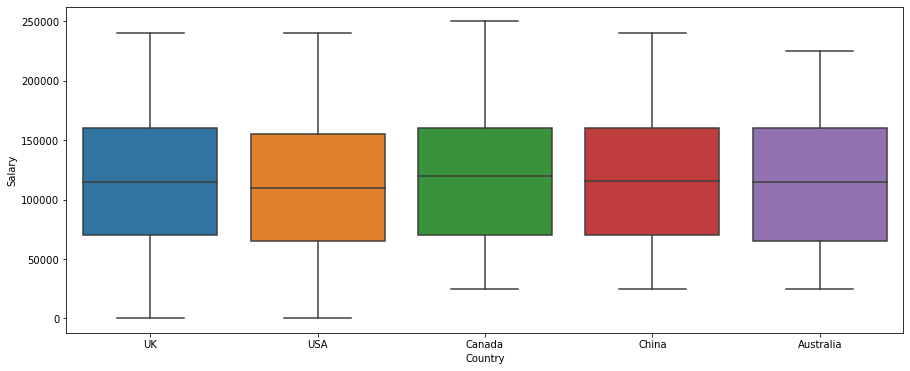

In [42]:
fig,ax = plt.subplots(figsize=(15,6))
sns.boxplot(x = 'Country', y = 'Salary', data = df, ax=ax)


El box plot describe sobre el salario en todos los paises, donde existe una variación muy pequeña en el salario medio en EE. UU., Que es ligeramente menor en comparación con otros países.

## Posicion y salario segun Pais

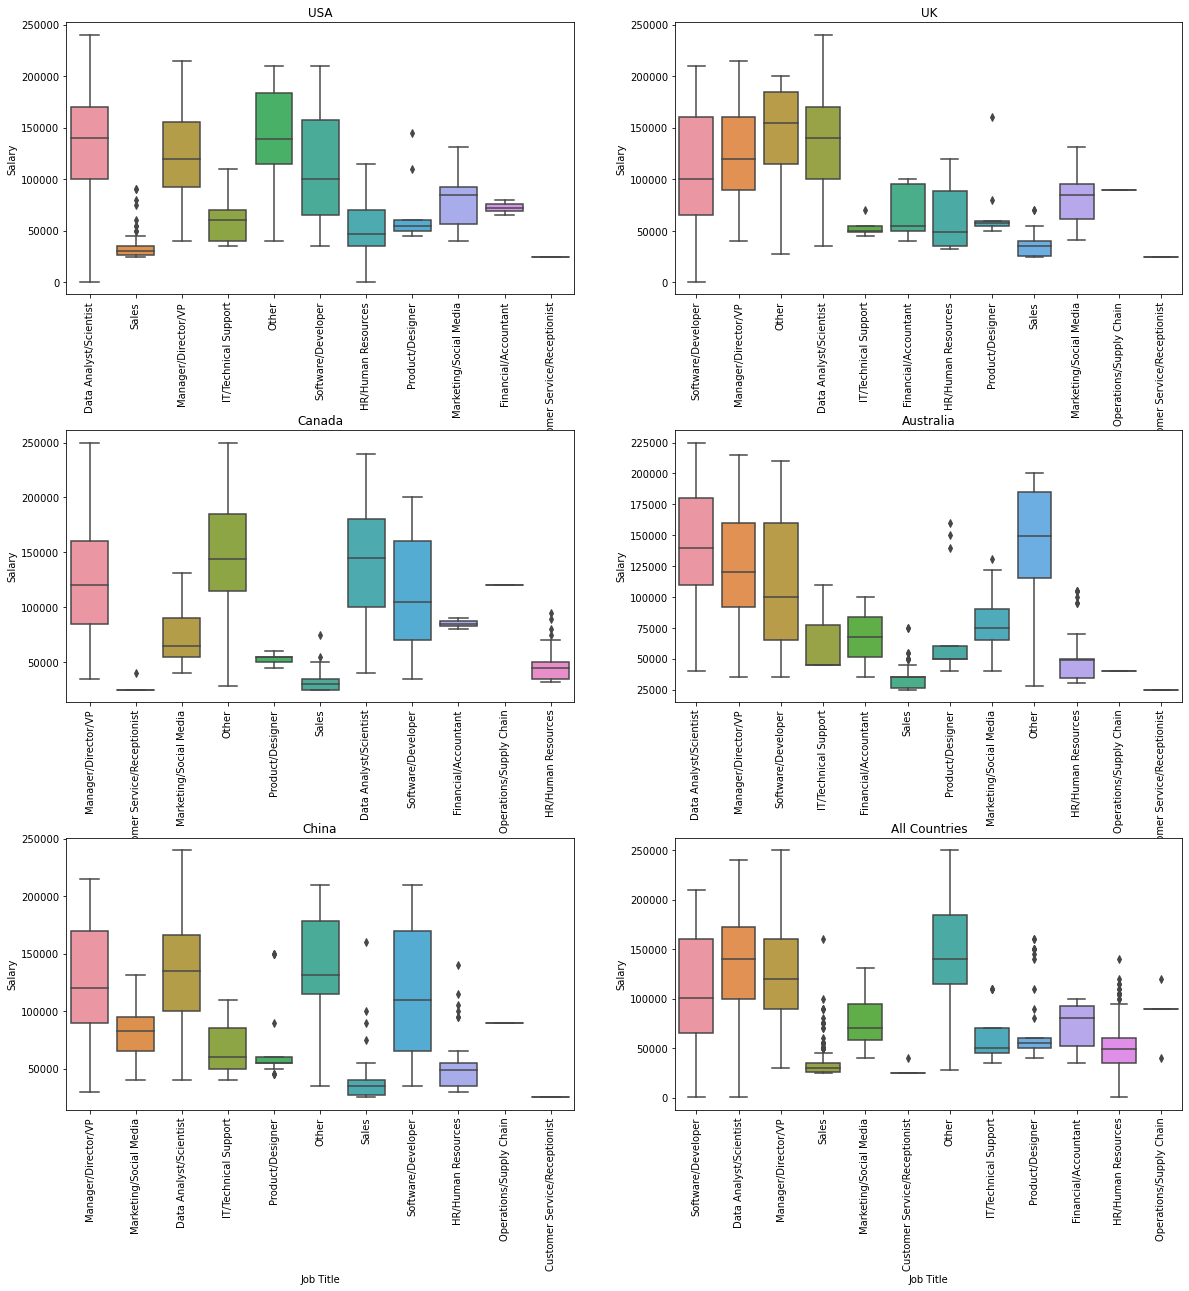

In [43]:
fig,ax = plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'USA'], ax = ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)

Después de observar todas estas gráficas, concluyo que los Títulos de Trabajo como Desarrollador de Software, Gerente / Director / VP y Analista de Datos / Científico tienen una gran demanda y reciben un salario mucho más alto que otros títulos de trabajo, excluyendo los Títulos de Trabajo que se incluyen en Categoría 'Otros'. Los títulos de trabajo como Operación / Cadena de suministro, Servicio al cliente / Recepcionista, Diseñador de productos y ventas tienen poca demanda y tienen un salario bajo.

### Salario y razas

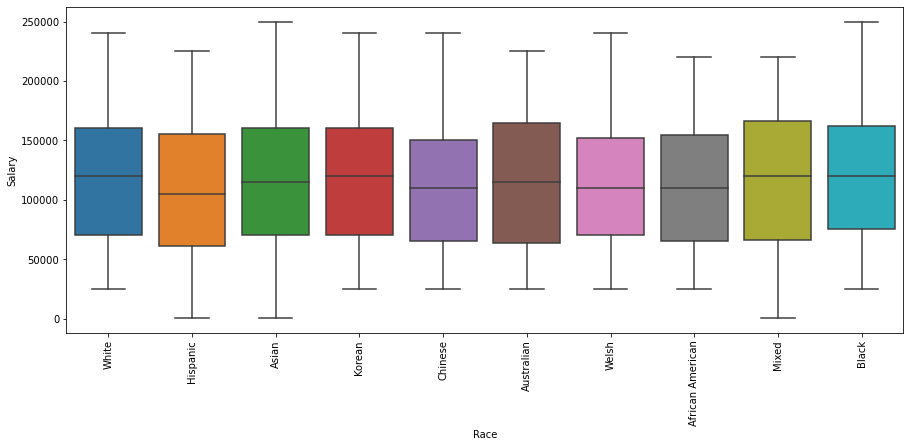

In [45]:
fig,ax = plt.subplots(figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', data = df, ax = ax)
ax.tick_params(axis='x', rotation=90)


Los empleados de las razas: australianos, mixtos, negros y blancos tienen el salario medio más alto, seguidos por los asiáticos, coreanos y chinos.el salario medio más bajo  se encuentra en  los empleados de raza hispana. 

## Pre procesamiento de datos para modelar

### codificar variariables categoricas

In [46]:
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature, df[feature].unique())

Gender [1 0 3 2]
Country [3 4 1 2 0]
Education Level [0 2 3 4 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


### Normalizacion de variable numericas

In [47]:
#normalizacion
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [48]:
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,-0.212877,1,0,11,-0.510797,-0.479839,3,9
1,1,-0.738221,0,2,1,-0.840909,-0.953483,4,5
2,2,1.494490,1,3,5,1.139763,0.656907,1,9
3,3,0.312467,0,0,10,-0.180685,-1.048212,4,5
4,4,2.413841,1,2,5,1.965043,1.604195,4,1


## Matriz de correlacion entre variables

<AxesSubplot:>

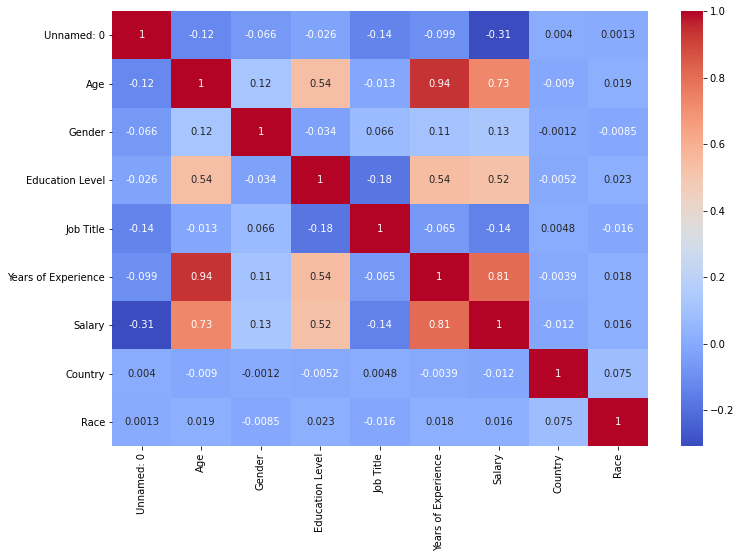

In [49]:
#coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

En esta matriz de correlación, hay tres correlaciones principales.
- Salario y edad
- Salario y  experiencia
-  experiencia y edad

La correlación entre el salario, la edad y  experiencia ya se explora en los gráficos anteriores. La correlación entre los años de experiencia y la edad es obvia a medida que la persona envejece la experiencia será más.

## Entrenamiento de datos

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Salary', axis=1), df['Salary'], test_size=0.2, random_state=42)

In [53]:
# Imputar valores NaN con la media para cada columna en X
# Asumiendo que X es un DataFrame de pandas
X_train = X_train.fillna(X_train.mean())

# Si y_train también tiene valores NaN, decide si deseas eliminar esas filas o imputarlas
# Por ejemplo, para imputar con la media:
y_train = y_train.fillna(y_train.mean())


In [54]:
# Reemplazar infinitos con NaN y luego imputar podría ser un enfoque
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
# Y luego imputas esos NaN como se mostró anteriormente

y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
y_train = y_train.fillna(y_train.mean())


In [56]:
X_train

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
2922,2922,2.413841,0,3,11,3.450547,1,1
4941,4941,-1.000892,1,0,5,-0.510797,2,6
135,135,0.706474,0,0,8,0.314483,1,3
2306,2306,-1.394900,0,0,11,-1.171021,2,9
3433,3433,0.575138,1,3,5,0.479539,0,9
...,...,...,...,...,...,...,...,...
3772,3772,0.969146,1,3,1,0.644595,4,9
5191,5191,-1.000892,0,0,5,-0.840909,0,1
5226,5226,-0.869557,1,0,9,-0.840909,3,8
5390,5390,-0.344213,0,0,6,-0.675853,0,1


## Modelos

## Salary Prediction

I will be using the following models:
- Decision Tree Regressor
- Random Forest Regressor
- Ridge Regression
- Lasso Regression
- Gradient Boosting
- SVR



### Decision Tree Regressor

In [58]:
from sklearn.tree import DecisionTreeRegressor

#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

#### Hypertuning the model

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
# Asumiendo que X_train y y_train están ya definidos y preparados

# Definiendo el diccionario de modelos con los modelos iniciales
modelos = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

# Diccionario de parámetros para la búsqueda en cuadrícula
parametros_modelos = {
    "Decision Tree": {'max_depth' :[2,4,6,8,10], 'min_samples_split' :[2,4,6,8], 'min_samples_leaf' :[2,4,6,8], 'max_features' :['auto','sqrt','log2'], 'random_state' :[0,42]},
    "Random Forest": {'max_depth' :[2,4,6,8,10], 'min_samples_split' :[2,4,6,8], 'min_samples_leaf' :[2,4,6,8], 'max_features' :['auto','sqrt','log2'], 'random_state' :[0,42]},
    "Ridge Regression": {'alpha': [0.01, 0.1, 1, 10, 100]},
    "Lasso Regression": {'alpha': [0.01, 0.1, 1, 10, 100]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'max_depth': [3, 4, 5], 'learning_rate': [0.01, 0.1]},
    "SVR": {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto']}
}

# Definir el diccionario para almacenar los resultados de la búsqueda en cuadrícula
resultados_grid_search = {}

# Realizando Grid Search para cada modelo
for nombre, modelo in modelos.items():
    print(f"Realizando Grid Search para: {nombre}")
    grid_search = GridSearchCV(modelo, parametros_modelos[nombre], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    mejores_parametros = grid_search.best_params_
    mejor_score = grid_search.best_score_
    print(f"Mejores parámetros para {nombre}: {mejores_parametros}")
    print(f"Mejor score (neg_mean_squared_error) para {nombre}: {mejor_score}")
    resultados_grid_search[nombre] = (mejores_parametros, mejor_score)


Realizando Grid Search para: Decision Tree
Mejores parámetros para Decision Tree: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}
Mejor score (neg_mean_squared_error) para Decision Tree: -0.02196777167833297
Realizando Grid Search para: Random Forest
Mejores parámetros para Random Forest: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}
Mejor score (neg_mean_squared_error) para Random Forest: -0.014102242783404256
Realizando Grid Search para: Ridge Regression
Mejores parámetros para Ridge Regression: {'alpha': 1}
Mejor score (neg_mean_squared_error) para Ridge Regression: -0.2563008540665289
Realizando Grid Search para: Lasso Regression
Mejores parámetros para Lasso Regression: {'alpha': 0.01}
Mejor score (neg_mean_squared_error) para Lasso Regression: -0.26012294045539247
Realizando Grid Search para: Gradient Boosting
Mejores parámetros para Gradient Boosting: {'learn

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
resultados_grid = {}
for nombre, modelo in modelos.items():
    grid_search = GridSearchCV(modelo, parametros_modelos[nombre], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    resultados_grid[nombre] = grid_search

    

for nombre, grid_search in resultados_grid.items():
    print(f"Evaluando rendimiento para: {nombre}")
    
    # Usar el mejor modelo entrenado encontrado por GridSearchCV
    mejor_modelo = grid_search.best_estimator_
    
    # Predecir en el conjunto de entrenamiento
    y_pred_train = mejor_modelo.predict(X_train)
    
    # Calcular métricas de rendimiento
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    
    print(f"MSE en entrenamiento para {nombre}: {mse_train:.2f}")
    print(f"R^2 en entrenamiento para {nombre}: {r2_train:.2f}")


Evaluando rendimiento para: Decision Tree
MSE en entrenamiento para Decision Tree: 0.01
R^2 en entrenamiento para Decision Tree: 0.99
Evaluando rendimiento para: Random Forest
MSE en entrenamiento para Random Forest: 0.01
R^2 en entrenamiento para Random Forest: 0.99
Evaluando rendimiento para: Ridge Regression
MSE en entrenamiento para Ridge Regression: 0.25
R^2 en entrenamiento para Ridge Regression: 0.75
Evaluando rendimiento para: Lasso Regression
MSE en entrenamiento para Lasso Regression: 0.26
R^2 en entrenamiento para Lasso Regression: 0.74
Evaluando rendimiento para: Gradient Boosting
MSE en entrenamiento para Gradient Boosting: 0.00
R^2 en entrenamiento para Gradient Boosting: 1.00
Evaluando rendimiento para: SVR
MSE en entrenamiento para SVR: 0.84
R^2 en entrenamiento para SVR: 0.17


## Elijo Desicion Tree regression

In [95]:
# Eliminar la columna "Unnamed" si existe
if "Unnamed" in X_train.columns:
    X_train = X_train.drop(columns=["Unnamed"])


In [96]:
X_train

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
2922,2.413841,0,3,11,3.450547,1,1
4941,-1.000892,1,0,5,-0.510797,2,6
135,0.706474,0,0,8,0.314483,1,3
2306,-1.394900,0,0,11,-1.171021,2,9
3433,0.575138,1,3,5,0.479539,0,9
...,...,...,...,...,...,...,...
3772,0.969146,1,3,1,0.644595,4,9
5191,-1.000892,0,0,5,-0.840909,0,1
5226,-0.869557,1,0,9,-0.840909,3,8
5390,-0.344213,0,0,6,-0.675853,0,1


In [98]:
from sklearn.tree import DecisionTreeRegressor



#createing the decision tree gressor object
dtree = DecisionTreeRegressor()

#defining the parameters for the grid search
parameters = {'max_depth' :[2,4,6,8,10],
              'min_samples_split' :[2,4,6,8],
              'min_samples_leaf' :[2,4,6,8],
              'max_features' :['auto','sqrt','log2'],
              'random_state' :[0,42]}
#creating the grid search object
grid_search = GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)

#fit the grid search object to the training data
grid_search.fit(X_train,y_train)

#print the best parameters
print(grid_search.best_params_)
dtree = DecisionTreeRegressor(max_depth = 10, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dtree

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


DecisionTreeRegressor(max_depth=10, max_features='auto', min_samples_leaf=2,
                      min_samples_split=8, random_state=42)

In [99]:
#fitting the training data
dtree.fit(X_train,y_train)

#training accuracy
dtree.score(X_train, y_train)

0.9668096840185753

In [104]:
# Eliminar la columna "Unnamed" si existe
if "Unnamed: 0" in X_test.columns:
    X_test = X_test.drop(columns=["Unnamed: 0"])


In [105]:
X_test

,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
2794,1.231818,0,3,11,1.799987,2,9
2233,0.049795,1,2,11,-0.015629,3,8
5559,-0.869557,1,0,11,-0.840909,1,1
6355,-0.738221,1,1,10,-1.005965,3,8
263,-0.344213,0,0,6,-0.840909,0,9
...,...,...,...,...,...,...,...
3193,-1.394900,0,0,11,-1.171021,2,6
2157,1.625826,1,3,11,1.304819,4,5
2202,0.049795,1,2,11,0.149427,4,5
1801,1.625826,1,3,8,1.139763,4,5


In [106]:
# Imputar valores NaN con la media para cada columna en X
# Asumiendo que X es un DataFrame de pandas
X_test = X_test.fillna(X_train.mean())

# Si y_train también tiene valores NaN, decide si deseas eliminar esas filas o imputarlas
# Por ejemplo, para imputar con la media:
y_test = y_test.fillna(y_test.mean())

In [107]:
#predicting the salary of an employee 
d_pred = dtree.predict(X_test)

## Evaluating the Decision Tree Regressor Model

In [108]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.779789,0.722893
1,0.467450,0.381329
2,-0.669296,-0.703884
3,-1.427127,-1.496595
4,-1.237669,-1.383822
5,-0.385110,-0.505953
6,-1.142941,-1.119258
7,-1.616585,-1.586271
8,0.846365,0.851628
9,0.751636,0.345334


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Predicted', ylabel='Density'>

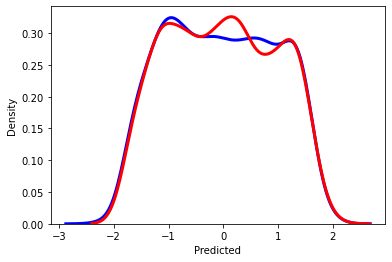

In [109]:
ax = sns.distplot(dft['Actual'], color = 'blue', hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Actual')
sns.distplot(  dft['Predicted'], color = 'red', ax=ax, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Predicted')

La linea azul muestra el recuento de distribución para los valores reales y la línea roja muestra el recuento de distribución para los valores previstos. Los valores previstos son cercanos a los valores reales y la curva coincide con la curva de valores reales. Esto demuestra que el modelo encaja bien.

In [110]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, d_pred)))

R2 Score:  0.9283974309460921
Mean Squared Error:  0.06863957639215666
Mean Absolute Error:  0.1403545438728639
RMSE: 0.2619915578642882


In [111]:
X_train.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Country', 'Race'],
      dtype='object')

        Caracteristica  Importancia
4  Years of Experience     0.786911
0                  Age     0.081626
3            Job Title     0.081545
2      Education Level     0.035942
1               Gender     0.010536
6                 Race     0.001838
5              Country     0.001602


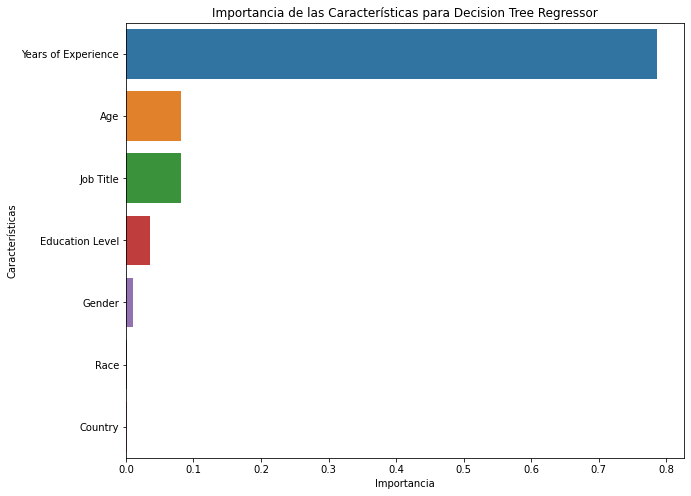

In [112]:

##

# Obtener las importancias de las características
importancias = dtree.feature_importances_

# Asumiendo que X_train es un DataFrame de pandas y conoces los nombres de las características
nombres_caracteristicas = X_train.columns

# Crear un DataFrame para visualizar las importancias
importancias_df = pd.DataFrame({'Caracteristica': nombres_caracteristicas, 'Importancia': importancias})

# Ordenar el DataFrame por importancia de forma descendente
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Mostrar las importancias
print(importancias_df)

# También puedes visualizar las importancias de las características en un gráfico
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Caracteristica', data=importancias_df)
plt.title('Importancia de las Características para Decision Tree Regressor')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


MSE: 0.07
MAE: 0.14
R^2: 0.93


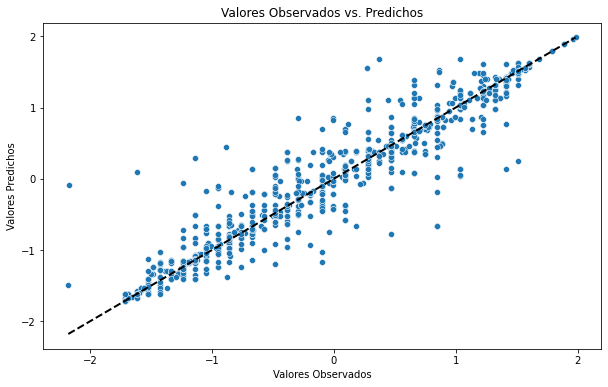

In [114]:
# Asumiendo que 'mejor_modelo' es tu modelo entrenado y que ya tienes X_test y y_test
y_pred = dtree.predict(X_test)

# Importar las métricas necesarias
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

# Visualizar la relación lineal entre los valores predichos y observados
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de identidad
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.title('Valores Observados vs. Predichos')
plt.show()


## Conclusion

Del análisis de datos exploratorios, he concluido que el salario de los empleados depende de los siguientes factores:

Años de experiencia
Título del trabajo
Nivel de educación

Los empleados con mayores años de experiencia, con un puesto de trabajo como analista de datos / científico, desarrollador de software o director / gerente / vicepresidente y con una maestría o doctorado, tienen más probabilidades de tener un salario más alto.

En lo que respecta a los modelos de aprendizaje automático, he utilizado modelos regresores: el regresor del árbol de decisión 